**CAPACITATED VEHICLE ROUTING PROBLEM CODE**

In [ ]:
from google.colab import files
from IPython.display import Image
uploaded=files.upload()

Saving route fig.jpg to route fig.jpg


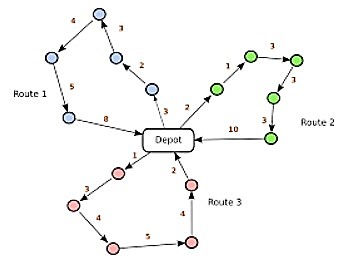

In [ ]:
Image('route fig.jpg',width=800,height=400)

In [45]:
uploaded=files.upload()

Saving formula.jpg to formula (3).jpg


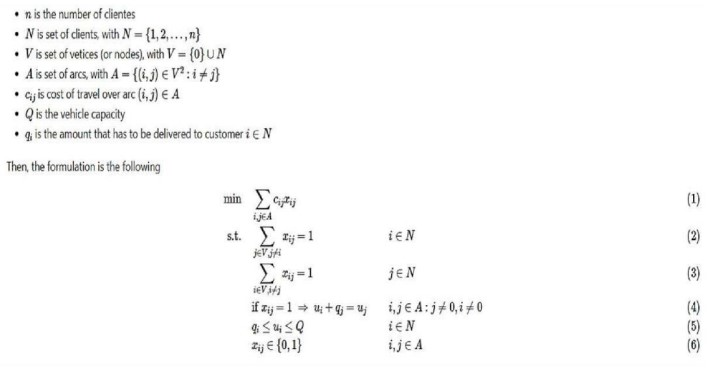

In [46]:
Image('formula.jpg',width=800,height=400)

In [24]:
import numpy as np
rnd=np.random
rnd.seed(0)

In [23]:
n=10 # number of clients
Q=20 #Q=vehicle capacity
N=[i for i in range(1,n+1)]
V=[0]+N
q={i:rnd.randint(1,10) for i in N}

In [20]:
N

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [21]:
V

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [22]:
q # for client 1 have demand 6, client 2 has demand 1, client 3 has demand 4...

{1: 6, 2: 1, 3: 4, 4: 4, 5: 8, 6: 4, 7: 6, 8: 3, 9: 5, 10: 8}

In [25]:
# training for random client
loc_x=rnd.rand(len(V))* 200
loc_y= rnd.rand(len(V))*100

In [26]:
A=[(i,j) for i in V for j in V if i!=j]
c={(i,j): np.hypot(loc_x[i]-loc_x[j],loc_y[i]-loc_y[j]) for i,j in A}  # euclidian distance: hypot

In [27]:
A #defined in a network that consists of nodes and connection between nodes. this basically represents a set of all possible arcs (connections) between node i and node j

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (1, 0),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (2, 0),
 (2, 1),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (5, 0),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 10),
 (6, 0),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 7),
 (6, 8),
 (6, 9),
 (6, 10),
 (7, 0),
 (7, 1),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6),
 (7, 8),
 (7, 9),
 (7, 10),
 (8, 0),
 (8, 1),
 (8, 2),
 (8, 3),
 (8, 4),
 (8, 5),
 (8, 6),
 (8, 7),
 (8, 9),
 (8, 10),
 (9, 0),
 (9, 1),
 (9, 2),
 (9, 3),
 (9, 4),
 (9, 5),
 (9, 6),
 (9, 7),
 (9, 8),
 (9, 10),
 (10, 0),
 (10, 1),
 (10, 2),
 (10, 3),
 (10, 4),
 (10, 5),
 (10, 6),
 (10, 7),
 (10, 8),


In [28]:
c  # it is cost of overall arc(i,j) belong to A

{(0, 1): 33.504686960860795,
 (0, 2): 41.11138629503385,
 (0, 3): 45.79263333713419,
 (0, 4): 50.77555203012287,
 (0, 5): 54.44725732628541,
 (0, 6): 37.647574061136034,
 (0, 7): 72.98056771655875,
 (0, 8): 89.70844922828567,
 (0, 9): 55.82497026893104,
 (0, 10): 55.59374885917202,
 (1, 0): 33.504686960860795,
 (1, 2): 42.23764921128614,
 (1, 3): 60.2523224726414,
 (1, 4): 75.58102299795816,
 (1, 5): 56.50848025794605,
 (1, 6): 61.502187540784085,
 (1, 7): 41.09431251296798,
 (1, 8): 58.14985245467972,
 (1, 9): 78.02546809638228,
 (1, 10): 27.720843893358516,
 (2, 0): 41.11138629503385,
 (2, 1): 42.23764921128614,
 (2, 3): 86.23654979493304,
 (2, 4): 91.17823243082672,
 (2, 5): 90.94783124977752,
 (2, 6): 34.318704181986625,
 (2, 7): 59.652726097030026,
 (2, 8): 72.39358384965435,
 (2, 9): 44.183663197138415,
 (2, 10): 39.85130178750766,
 (3, 0): 45.79263333713419,
 (3, 1): 60.2523224726414,
 (3, 2): 86.23654979493304,
 (3, 4): 24.29902805451533,
 (3, 5): 20.831530577252774,
 (3, 6): 7

In [29]:
import matplotlib.pyplot as plt

(70.88609134840303, 198.53476451695838, -2.7701599799296193, 102.6538339472386)

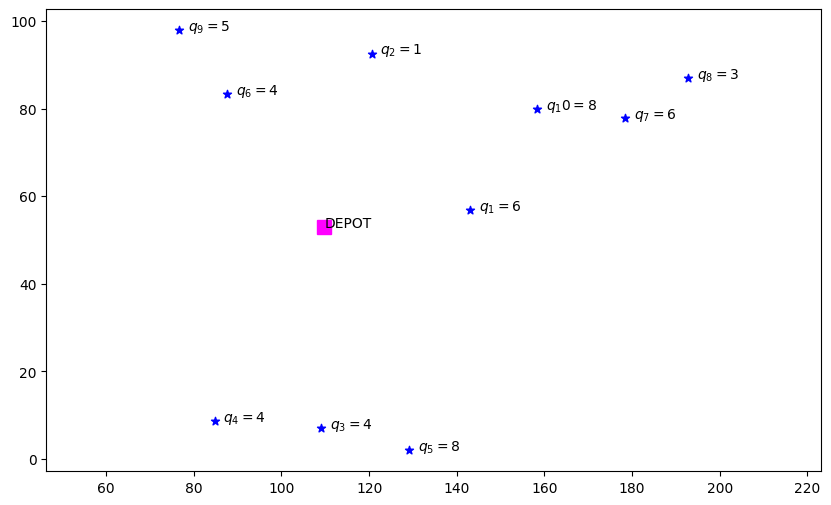

In [32]:
# plt.plot(loc_x,loc_y[0],c='r),marker='s') # this is the depot
#plt.scatter(loc_x[1:],loc_y[1:],c='green') # number of client and their distance from the depot
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(6)
plt.scatter(loc_x[1:],loc_y[1:], c='blue',marker='*')
for i in N:
  plt.annotate('$q_%d=%d$' %(i,q[i]), (loc_x[i]+2,loc_y[i]))# represents demand of each clent in the graph below
plt.plot(loc_x[0],loc_y[0], c='magenta', marker='s',markersize=10)
plt.text(loc_x[0],loc_y[0],"DEPOT")
plt.axis('equal')

In [33]:
pip install cplex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 MB 18.5 MB/s eta 0:00:00


- CPLEX is a powerful optimization solver that offers advanced capabilities for solving complex linear programming (LP), mixed-integer programming (MIP), quadratic programming (QP), and other optimization problems. It's a standalone software package that focuses on solving optimization problems efficiently.

- CPLEX provides a set of solvers for various optimization problems. It offers a wide range of algorithms and techniques for efficiently solving complex optimization problems. It's particularly known for its performance on large-scale linear and mixed-integer programming problems.

- CPLEX has its own modeling language (mathematical programming language) for defining optimization problems. Users need to formulate problems using this language.

- CPLEX is suitable for users who are experienced with optimization and want to utilize the solver's advanced capabilities to solve complex problems. It's often used by optimization experts and researchers.

In [34]:
pip install docplex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 633.5/633.5 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docplex: filename=docplex-2.25.236-py3-none-any.whl size=671350 sha256=9c3212620b7c2fef2e54825d52344c5a55d4bc27f095c2aa45e4893e9e0cfd73
  Stored in directory: /root/.cache/pip/wheels/3b/e5/00/0bf0173d67188fe73a13e3a61412b3f975f60205e3fab93a69
Successfully built docplex


- DOcplex is a Python library that serves as an interface to IBM's optimization engines, including CPLEX. It's designed to make it easier for users to formulate and solve optimization problems using a higher-level programming language.

- DOcplex is focused on problem formulation and modeling. It provides Python classes and methods to define decision variables, constraints, and objectives in a natural and intuitive way. It also facilitates the integration of optimization into Python workflows.

- DOcplex offers a high-level Pythonic interface for formulating optimization problems. Users can use Python syntax to create models, which can make the modeling process more intuitive for those familiar with Python.

- DOcplex is suitable for a broader audience, including those who are not optimization experts. It's designed to simplify the process of problem formulation and make optimization accessible to Python users.

- ***CPLEX is a standalone optimization solver known for its powerful algorithms and efficiency, while DOcplex is a Python library that acts as an interface to CPLEX, making optimization more accessible to Python users by providing a simpler and more intuitive way to formulate and solve optimization problems.***

In [35]:
# modelling the model
from docplex.mp.model import Model

In [37]:
mdl=Model('CVRP') # creating a model named 'CVRP' with default

In [39]:
x=mdl.binary_var_dict(A,name='x') # creating a dictionary of binary decision variables,indexed by key objective
# This line creates a dictionary of binary decision variables indexed by the keys in A. The variable x is a dictionary where the keys correspond to pairs (i, j)
#representing nodes in the problem (likely corresponding to nodes in a vehicle routing problem). These variables are binary,
#indicating whether a connection exists between nodes i and j.


u=mdl.continuous_var_dict(N,ub=Q, name='u') # create a dictionary of continous decison variables, indexed by key objective
# This line creates a dictionary of continuous decision variables indexed by the keys in N. The variable u represents the
#cumulative demand carried along the routes. The upper bound constraint ub=Q indicates that the cumulative demand at any node cannot exceed the capacity Q.

In [40]:
mdl.minimize(mdl.sum(c[i, j]*x[i, j] for i, j in A))
mdl.add_constraints(mdl.sum(x[i, j] for j in V if j != i) == 1 for i in N)
mdl.add_constraints(mdl.sum(x[i, j] for i in V if i != j) == 1 for j in N)
mdl.add_indicator_constraints(mdl.indicator_constraint(x[i, j], u[i]+q[j] == u[j]) for i, j in A if i != 0 and j != 0)
mdl.add_constraints(u[i] >= q[i] for i in N)
mdl.parameters.timelimit = 15
solution = mdl.solve(log_output=True)

Version identifier: 22.1.1.0 | 2023-02-11 | 22d6266e5
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               15
Found incumbent of value 1074.773652 after 0.00 sec. (0.01 ticks)
Tried aggregator 2 times.
MIP Presolve eliminated 10 rows and 0 columns.
MIP Presolve modified 45 coefficients.
Aggregator did 45 substitutions.
Reduced MIP has 65 rows, 165 columns, and 335 nonzeros.
Reduced MIP has 110 binaries, 0 generals, 0 SOSs, and 90 indicators.
Presolve time = 0.04 sec. (0.35 ticks)
Probing time = 0.00 sec. (0.32 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 65 rows, 165 columns, and 335 nonzeros.
Reduced MIP has 110 binaries, 0 generals, 0 SOSs, and 90 indicators.
Presolve time = 0.02 sec. (0.23 ticks)
Probing time = 0.00 sec. (0.31 ticks)
Clique table members: 65.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 2 threads.
Root relaxation

WHAT DOES THE ABOVE OUPUT MEANS?
The output provides insights into how the solver progresses through different stages of solving, including preprocessing, probing, branching, and relaxation. The objective is to minimize the value while considering various constraints. The solver iteratively refines its solution until it either finds an optimal solution or reaches the time limit. The output also indicates the final integral solution found, its objective value, and additional information about the solving process.

- "Objective": The current objective value of the solution.

- "ItCnt": The number of iterations

- "GAP"- The optimality gap, indicating the difference between the current solution's objective value and the best-known objective value.



In [41]:
print(solution)

solution for: CVRP
objective: 506.85
status: OPTIMAL_SOLUTION(2)
x_0_5=1
x_0_6=1
x_0_10=1
x_1_0=1
x_2_1=1
x_3_4=1
x_4_0=1
x_5_3=1
x_6_9=1
x_7_0=1
x_8_7=1
x_9_2=1
x_10_8=1
u_1=20.000
u_2=14.000
u_3=16.000
u_4=20.000
u_5=12.000
u_6=8.000
u_7=20.000
u_8=14.000
u_9=13.000
u_10=11.000



WHAT DOES THE ABOVE OUTPUT MEANS?
- Objective: 506.85:

This is the objective value of the solution, which represents the total cost or value that has been minimized in the optimization process. In this case, the optimal value of the objective function is 506.85.

- Status: OPTIMAL_SOLUTION(2):

Indicates the status of the solution. "OPTIMAL_SOLUTION" means that an optimal solution was found, and the value "(2)" is the numerical code for this status.

- Variable Assignments:

The lines following "x_0_5=1," "x_0_6=1," etc., list the assignment of binary decision variables in the solution. The format "x_i_j=value" indicates that the variable x[i, j] (which represents whether there is a connection between nodes i and j) is assigned the value value. A value of 1 indicates that the connection is chosen in the optimal solution.

- Cumulative Demand Variables:

The lines following "u_1=20.000," "u_2=14.000," etc., list the assignment of continuous decision variables u[i] representing the cumulative demand at each node i.

In [42]:
solution.solve_status

<JobSolveStatus.OPTIMAL_SOLUTION: 2>

In [43]:
active_arcs = [a for a in A if x[a].solution_value > 0.9]
# 'A': represents a set of all possible arcs (connections) from node i to nod j

# x[a].solution_value: This refers to the solution value of the binary decision variable
# x[a] associated with the arc a. In optimization problems, after solving, variables
# can have fractional solution values (between 0 and 1) that represent the strength of their presence in the solution.

# 'active_arcs': This is a new list has been created. It will store the arcs for which the condition is satisfied.

# '[a for a in A if x[a].solution_value > 0.9]': This list comprehension iterates over each arc a in the set A.
#For each arc, it checks whether the solution value of the associated binary variable x[a] is greater than 0.9.
#If this condition is met, the arc a is included in the active_arcs list.
# These arcs are considered to be "active" in the current solution because their corresponding binary variables have high
#values, indicating that these connections are strongly selected in the optimal solution.

(70.88609134840303, 198.53476451695838, -2.7701599799296193, 102.6538339472386)

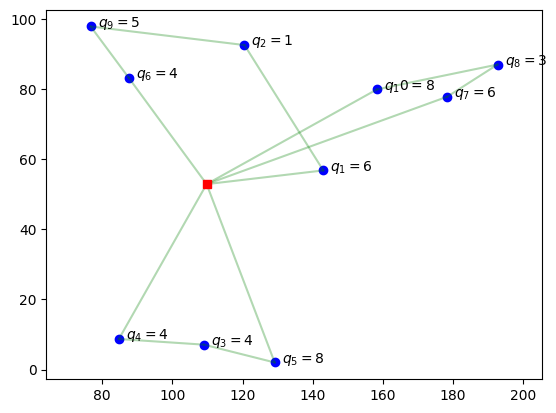

In [44]:
plt.scatter(loc_x[1:], loc_y[1:], c='b')
# here scatter function from the matplotlib.pyplot library is used to create sctter plot.
# It plots the points defined by the loc_x and loc_y arrays.
# loc_x represents the x-coordinates of the points, and loc_y represents the y-coordinates.
# The [1:] indexing is used to exclude the first point, which is usually a depot or starting point

for i in N:
    plt.annotate('$q_%d=%d$' % (i, q[i]), (loc_x[i]+2, loc_y[i]))
# The above for loop iterates over the set of nodes N and uses the annotate function to add text annotations to the plot.
# For each node index i, it creates an annotation showing the demand q[i] of that node at a position (loc_x[i]+2, loc_y[i]).
# The format %d is used to insert the node index and demand value into the annotation text.

for i, j in active_arcs:
# This loop iterates over the pairs of nodes in the active_arcs list. For each arc (i, j) in active_arcs,
# it uses the plot function to draw a line segment connecting the points (loc_x[i], loc_y[i]) and (loc_x[j], loc_y[j]).
    plt.plot([loc_x[i], loc_x[j]], [loc_y[i], loc_y[j]], c='g', alpha=0.3)
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.axis('equal')